In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
fn=pd.read_csv("Fraud_check.csv")
fn

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
fn.rename(columns={"Undergrad":"Undergrad","Marital.Status":"maratial","Taxable.Income":"income","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [5]:
fn

,Undergrad,maratial,income,population,experience,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fn.loc[fn["income"]<=3000,"income"]="risky"
fn.loc[fn["income"]>3000,"income"]="good"

In [7]:
fn

,Undergrad,maratial,income,population,experience,urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fn.columns:
    if fn[column_name].dtype == object:
        fn[column_name] = le.fit_transform(fn[column_name])
    else:
        pass
  

In [9]:
fn

,Undergrad,maratial,income,population,experience,urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [10]:
X=fn.iloc[:,:-1]
X

,Undergrad,maratial,income,population,experience
0,0,2,0,50047,10
1,1,0,0,134075,18
2,0,1,0,160205,30
3,1,2,0,193264,15
4,0,1,0,27533,28
...,...,...,...,...,...
595,1,0,0,39492,7
596,1,0,0,55369,2
597,0,0,0,154058,0
598,1,1,0,180083,17


In [11]:
Y=fn.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: urban, Length: 600, dtype: int32

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=40) 

In [13]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=10)
model.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=10)

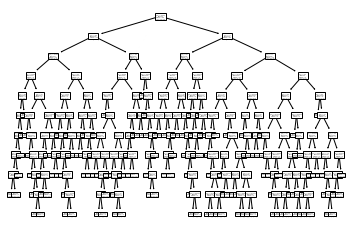

In [14]:
from sklearn import tree
tree.plot_tree(model);

In [15]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    62
0    58
dtype: int64

In [16]:
y_test.value_counts()

1    62
0    58
Name: urban, dtype: int64

In [23]:
np.mean(preds==y_test)

0.5916666666666667

In [24]:
preddata=model.predict(X)
fnew=fn
fnew['preddata']=preddata
fnew


,Undergrad,maratial,income,population,experience,urban,preddata
0,0,2,0,50047,10,1,0
1,1,0,0,134075,18,1,1
2,0,1,0,160205,30,1,1
3,1,2,0,193264,15,1,1
4,0,1,0,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,0,39492,7,1,1
596,1,0,0,55369,2,1,1
597,0,0,0,154058,0,1,1
598,1,1,0,180083,17,0,0


In [25]:
pd.crosstab(fn["preddata"],fn["urban"])

urban,0,1
preddata,,
0,243,43
1,55,259
